In [2]:
import os
import shutil
import joblib
import cv2
import warnings
import time
warnings.filterwarnings("ignore")

In [4]:
folder_list = os.listdir(r"C:\Users\Abdul Ikram\Desktop\FYP\data_set\augmented_data")

['aam',
 'aarhu',
 'amla',
 'amrood',
 'anaar',
 'anannaas',
 'angoor',
 'anjeer',
 'bair',
 'blueberry',
 'cherry',
 'chiku',
 'falsa',
 'ganna',
 'garma',
 'imli',
 'jamun',
 'kee_wee',
 'kela',
 'khajoor',
 'kharboza',
 'khubani',
 'kinnu',
 'kishmish',
 'lemoo',
 'litchi',
 'mawl_tuh',
 'nariyal',
 'nashpati',
 'papeeta',
 'saib',
 'shahtoot',
 'sharifa',
 'tarbooz',
 'zaitoon']

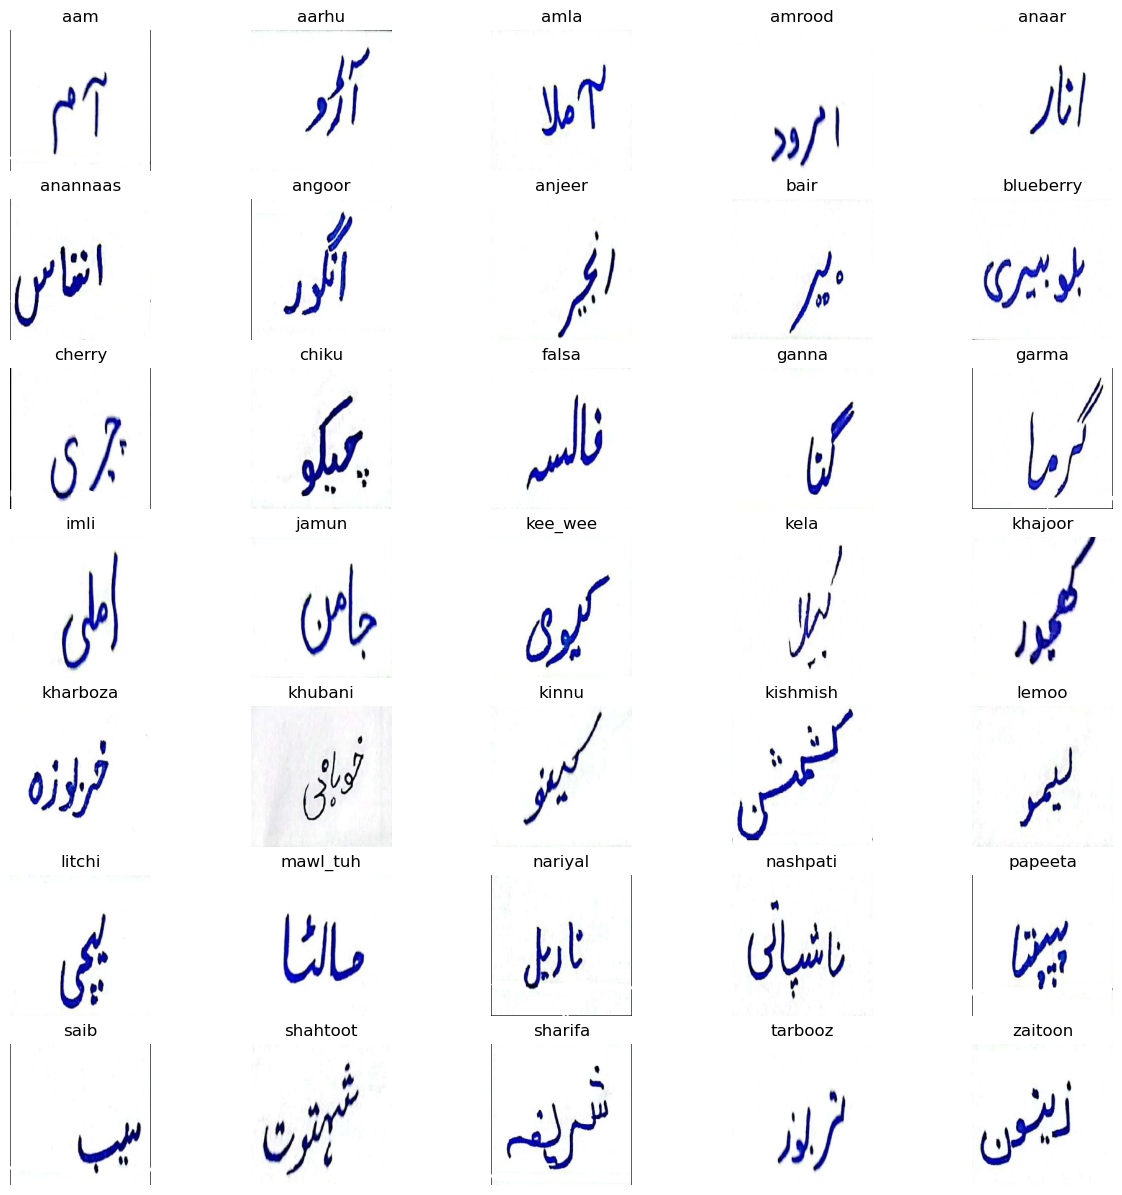

<Figure size 1500x1500 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import random

train_path = "C:/Users/Popeye/Desktop/FYP/data/fruitsSample/train/"
num_images_per_figure = 35
num_figures = len(folder_list) // num_images_per_figure + 1

for f in range(num_figures):
    fig = plt.figure(figsize=(15, 15))
    for i in range(num_images_per_figure):
        index = f * num_images_per_figure + i
        if index < len(folder_list):
            ax = fig.add_subplot(7, 5, i + 1)
            plt.title(folder_list[index])
            plt.axis("off")
            ax.imshow(load_img(train_path + folder_list[index] + f"/{folder_list[index]}_{random.randint(1, 88)}.png", target_size=(227, 227)))
    plt.show()

# Getting the count of images for each class

In [7]:
image_count = []
class_names = []
print('{:18s}'.format('class'), end='')
print('Count:')
print('-' * 24)

#Reading the image from each folder from training path
for folder in os.listdir(train_path):
    folder_num = len(os.listdir(os.path.join(train_path, folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)
print('-' * 24)    
print("Number of classes : ", len(class_names))

class             Count:
------------------------
aam                  88
aarhu                88
amla                 88
amrood               88
anaar                88
anannaas             88
angoor               88
anjeer               88
bair                 88
blueberry            88
cherry               88
chiku                88
falsa                88
ganna                88
garma                88
imli                 88
jamun                88
kee_wee              88
kela                 88
khajoor              88
kharboza             88
khubani              88
kinnu                88
kishmish             88
lemoo                88
litchi               88
mawl_tuh             88
nariyal              88
nashpati             88
papeeta              88
saib                 88
shahtoot             88
sharifa              88
tarbooz              88
zaitoon              88
------------------------
Number of classes :  35


In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = os.path.join('C:/Users/Popeye/Desktop/FYP/data/fruitsSample', 'train')
train_datagen = ImageDataGenerator(
    rotation_range=45,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), class_mode='categorical')

Found 3080 images belonging to 35 classes.


In [9]:
from keras.preprocessing.image import ImageDataGenerator
validation_dir = os.path.join('C:/Users/Popeye/Desktop/FYP/data/fruitsSample', 'validation')
validation_datagen = ImageDataGenerator()
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), class_mode='categorical')

Found 770 images belonging to 35 classes.


In [10]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))),
model.add(layers.MaxPooling2D((2, 2))),

model.add(layers.Conv2D(64, (3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),

model.add(layers.Conv2D(128, (3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),

model.add(layers.Dropout(0.2)),

model.add(layers.Conv2D(128, (3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),

model.add(layers.Conv2D(128, (3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),

model.add(layers.Flatten()),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(35, activation='softmax'))

In [11]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
filePath = "C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/weights-imprvt-{epoch:02d}-{acc:.2f}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(
    filePath,
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max'
)

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [14]:
log_csv = CSVLogger(f"C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/my_logs.csv", 
                    separator=',', 
                    append=False
)

In [15]:
callback_list = [checkpoint, log_csv]

In [16]:
start_time = time.time()

history = model.fit_generator(train_generator, epochs=150, callbacks=callback_list, validation_data=validation_generator)

end_time = time.time()
training_time = end_time - start_time

hours = int(training_time // 3600)
minutes = int((training_time % 3600) // 60)
seconds = int(training_time % 60)

print(f"Training time: {hours}:{minutes}:{seconds}")

Epoch 1/150
97/97 [==============================] - ETA: 0s - loss: 4.4522 - acc: 0.0266
Epoch 1: val_acc improved from -inf to 0.05065, saving model to C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches\weights-imprvt-01-0.03-0.05.h5
97/97 [==============================] - 123s 1s/step - loss: 4.4522 - acc: 0.0266 - val_loss: 3.5527 - val_acc: 0.0506
Epoch 2/150
97/97 [==============================] - ETA: 0s - loss: 3.5172 - acc: 0.0474
Epoch 2: val_acc improved from 0.05065 to 0.14416, saving model to C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches\weights-imprvt-02-0.05-0.14.h5
97/97 [==============================] - 119s 1s/step - loss: 3.5172 - acc: 0.0474 - val_loss: 3.1303 - val_acc: 0.1442
Epoch 3/150
97/97 [==============================] - ETA: 0s - loss: 3.0825 - acc: 0.1412
Epoch 3: val_acc improved from 0.14416 to 0.25065, saving model to C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches\weights-imprvt-03

Epoch 25/150
97/97 [==============================] - ETA: 0s - loss: 0.4221 - acc: 0.8692
Epoch 25: val_acc did not improve from 0.89481
97/97 [==============================] - 119s 1s/step - loss: 0.4221 - acc: 0.8692 - val_loss: 0.3818 - val_acc: 0.8896
Epoch 26/150
97/97 [==============================] - ETA: 0s - loss: 0.4307 - acc: 0.8640
Epoch 26: val_acc improved from 0.89481 to 0.90260, saving model to C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches\weights-imprvt-26-0.86-0.90.h5
97/97 [==============================] - 119s 1s/step - loss: 0.4307 - acc: 0.8640 - val_loss: 0.3498 - val_acc: 0.9026
Epoch 27/150
97/97 [==============================] - ETA: 0s - loss: 0.3732 - acc: 0.8854
Epoch 27: val_acc improved from 0.90260 to 0.91299, saving model to C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches\weights-imprvt-27-0.89-0.91.h5
97/97 [==============================] - 121s 1s/step - loss: 0.3732 - acc: 0.8854 - val_loss: 0.305

Epoch 55/150
97/97 [==============================] - ETA: 0s - loss: 0.2059 - acc: 0.9344
Epoch 55: val_acc did not improve from 0.94416
97/97 [==============================] - 109s 1s/step - loss: 0.2059 - acc: 0.9344 - val_loss: 0.2447 - val_acc: 0.9377
Epoch 56/150
97/97 [==============================] - ETA: 0s - loss: 0.2565 - acc: 0.9201
Epoch 56: val_acc did not improve from 0.94416
97/97 [==============================] - 131s 1s/step - loss: 0.2565 - acc: 0.9201 - val_loss: 0.2880 - val_acc: 0.9195
Epoch 57/150
97/97 [==============================] - ETA: 0s - loss: 0.2076 - acc: 0.9331
Epoch 57: val_acc did not improve from 0.94416
97/97 [==============================] - 115s 1s/step - loss: 0.2076 - acc: 0.9331 - val_loss: 0.3713 - val_acc: 0.8896
Epoch 58/150
97/97 [==============================] - ETA: 0s - loss: 0.2390 - acc: 0.9250
Epoch 58: val_acc did not improve from 0.94416
97/97 [==============================] - 115s 1s/step - loss: 0.2390 - acc: 0.9250 - val

Epoch 117/150
97/97 [==============================] - ETA: 0s - loss: 0.1550 - acc: 0.9545
Epoch 117: val_acc did not improve from 0.95325
97/97 [==============================] - 131s 1s/step - loss: 0.1550 - acc: 0.9545 - val_loss: 0.2694 - val_acc: 0.9390
Epoch 118/150
97/97 [==============================] - ETA: 0s - loss: 0.1352 - acc: 0.9614
Epoch 118: val_acc improved from 0.95325 to 0.95455, saving model to C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches\weights-imprvt-118-0.96-0.95.h5
97/97 [==============================] - 126s 1s/step - loss: 0.1352 - acc: 0.9614 - val_loss: 0.2233 - val_acc: 0.9545
Epoch 119/150
97/97 [==============================] - ETA: 0s - loss: 0.1708 - acc: 0.9532
Epoch 119: val_acc did not improve from 0.95455
97/97 [==============================] - 126s 1s/step - loss: 0.1708 - acc: 0.9532 - val_loss: 0.3882 - val_acc: 0.9286
Epoch 120/150
97/97 [==============================] - ETA: 0s - loss: 0.1855 - acc: 0.9513
Epoc

Epoch 148/150
97/97 [==============================] - ETA: 0s - loss: 0.1207 - acc: 0.9620
Epoch 148: val_acc did not improve from 0.95844
97/97 [==============================] - 123s 1s/step - loss: 0.1207 - acc: 0.9620 - val_loss: 0.2606 - val_acc: 0.9519
Epoch 149/150
97/97 [==============================] - ETA: 0s - loss: 0.1518 - acc: 0.9627
Epoch 149: val_acc did not improve from 0.95844
97/97 [==============================] - 123s 1s/step - loss: 0.1518 - acc: 0.9627 - val_loss: 0.2163 - val_acc: 0.9416
Epoch 150/150
97/97 [==============================] - ETA: 0s - loss: 0.1328 - acc: 0.9601
Epoch 150: val_acc improved from 0.95844 to 0.96104, saving model to C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches\weights-imprvt-150-0.96-0.96.h5
97/97 [==============================] - 123s 1s/step - loss: 0.1328 - acc: 0.9601 - val_loss: 0.1754 - val_acc: 0.9610
Training time: 5:7:16


In [17]:
with open(f"C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/training_time.txt", "w") as file: 
    file.write(f"Training time: {hours}:{minutes}:{seconds}")

In [18]:
train_loss, train_acc = model.evaluate_generator(train_generator)
test_loss, test_acc = model.evaluate_generator(validation_generator)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.971, Test: 0.961


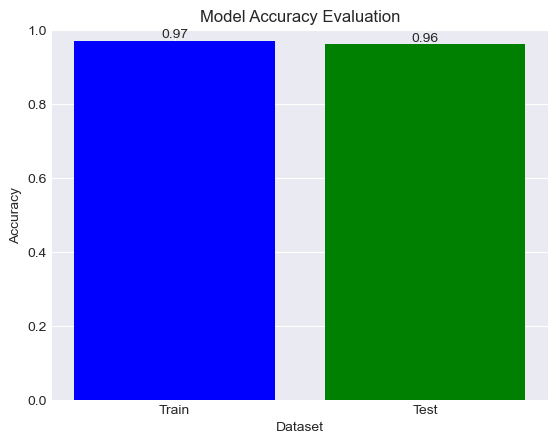

In [19]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Data
accuracy = [train_acc, test_acc]
labels = ['Train', 'Test']

# Plot
plt.bar(labels, accuracy, color=['blue', 'green'])
plt.title('Model Accuracy Evaluation')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to ensure readability

# Add percentages on top of bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.savefig(f"C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/graphs/Evaluation_Graph.png")
plt.show()

# Plotting train & validation accuracy

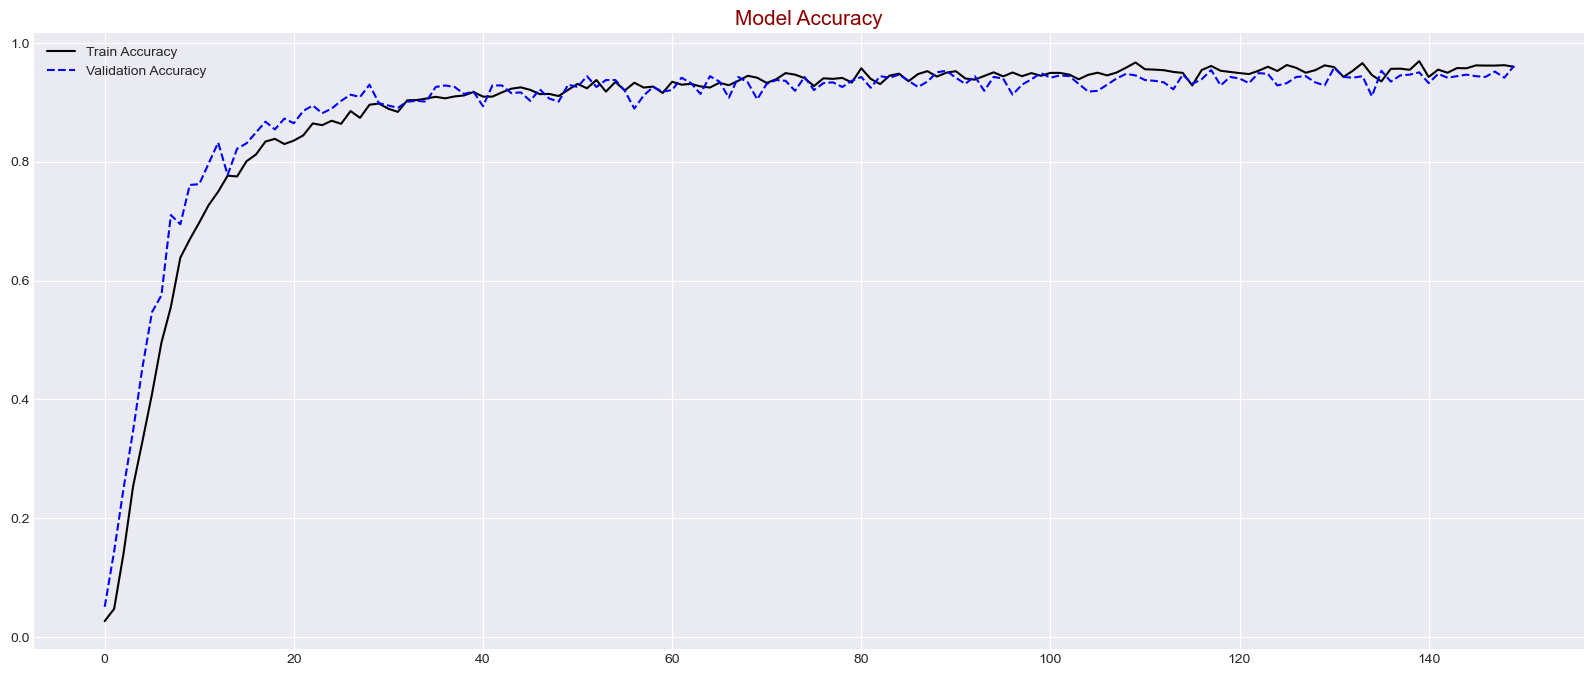

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot(history.history["acc"], label="Train Accuracy", color="black")
plt.plot(history.history["val_acc"], label = "Validation Accuracy", color="blue", linestyle="dashed")
plt.title("Model Accuracy", color="darkred", size=15)
plt.legend()
plt.savefig(f"C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/graphs/Accuracy_plot.png")
plt.show()

# Plotting train & validation loss

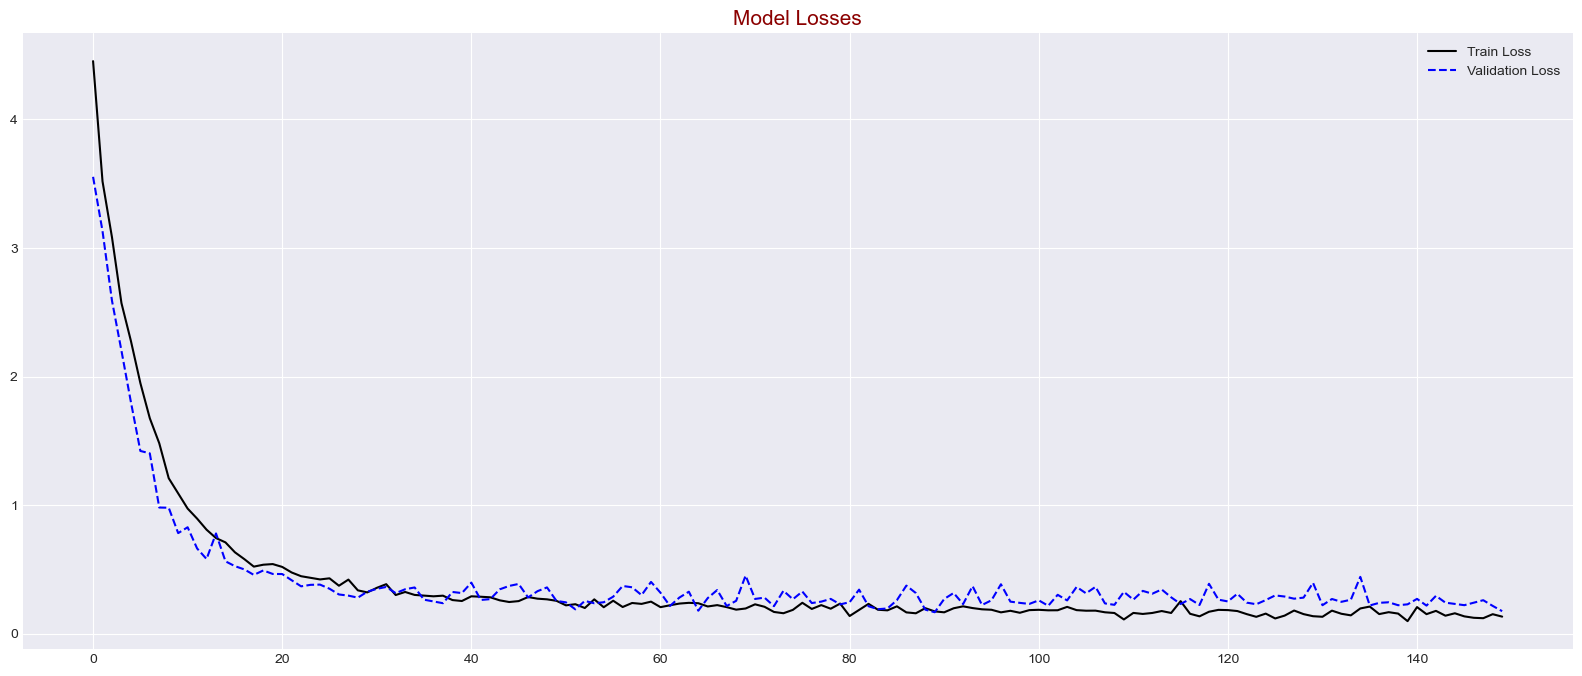

In [21]:
plt.figure(figsize=(20, 8))
plt.plot(history.history["loss"], label="Train Loss", color="black")
plt.plot(history.history["val_loss"], label="Validation Loss", color="blue", linestyle="dashed")
plt.title("Model Losses", color="darkred", size=15)
plt.legend()
plt.savefig(f"C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/graphs/Loss_plot.png")
plt.show()

# Plotting Confusion Matrix

25/25 [==============================] - 8s 311ms/step


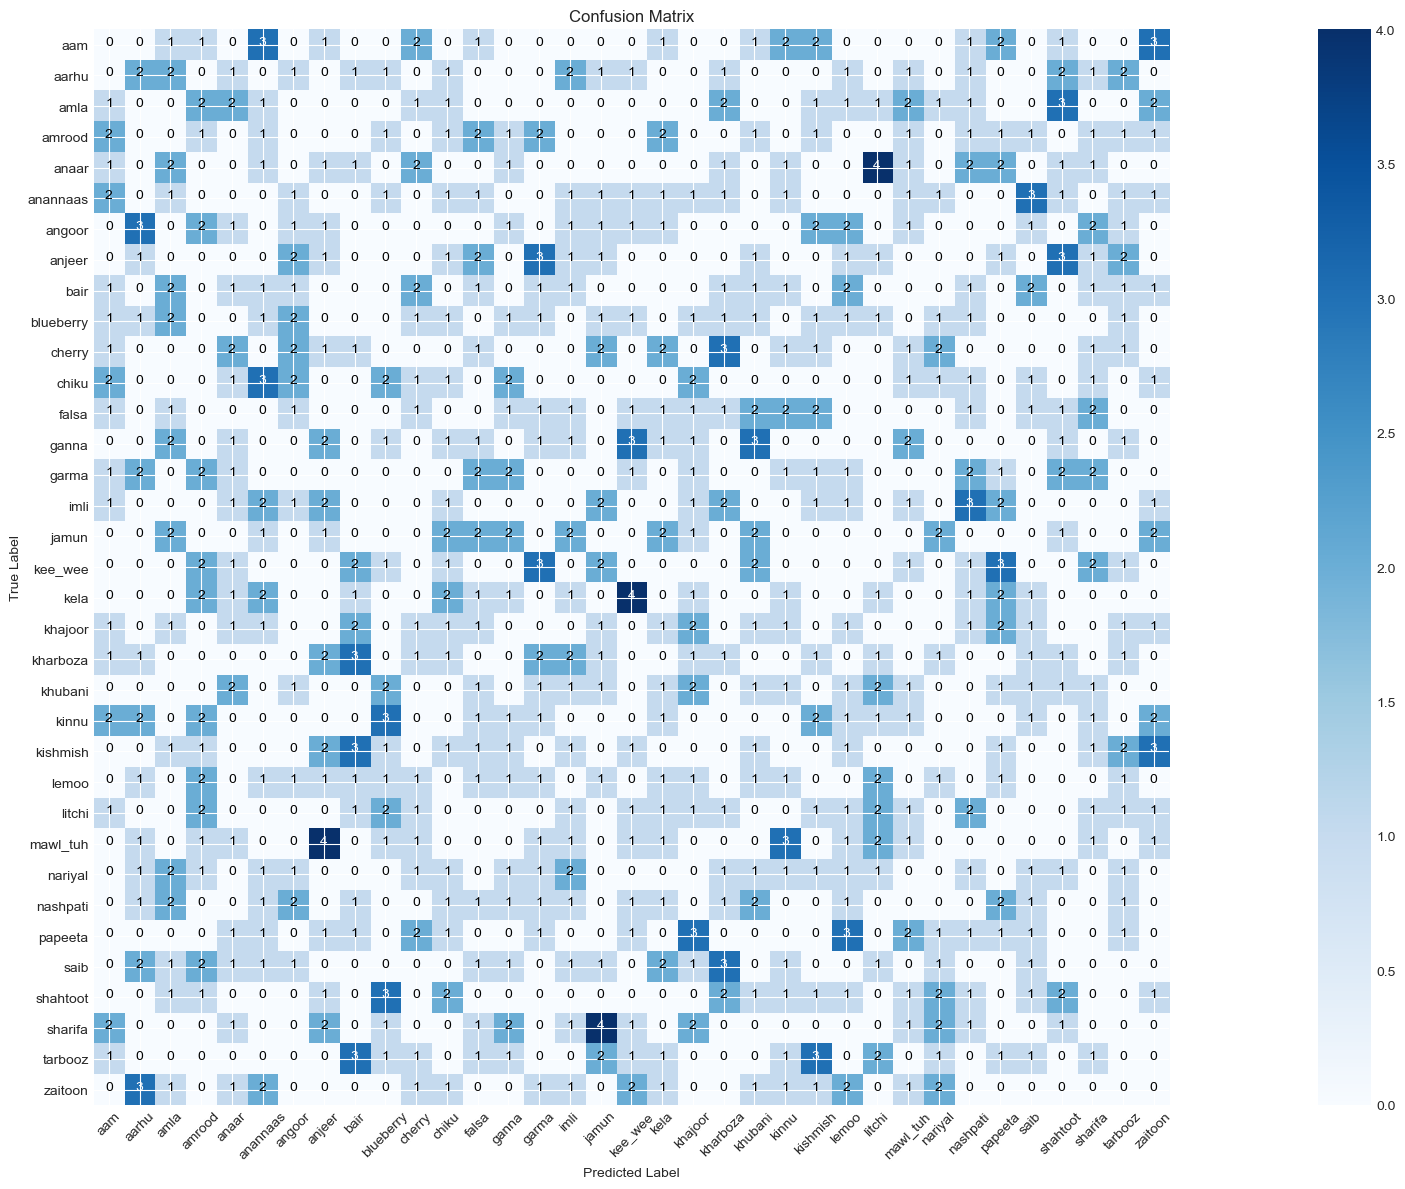

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate predictions for the test/validation data
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Extract true labels from the test/validation data generator
true_classes = validation_generator.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(30, 12))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(validation_generator.class_indices))
plt.xticks(tick_marks, validation_generator.class_indices, rotation=45)
plt.yticks(tick_marks, validation_generator.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Display the confusion matrix
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.savefig(f"C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/graphs/Confusion_Matrix.png")
plt.show()


# Get the last epoch's accuracy and validation accuracy

In [23]:
last_epoch = len(history.history['acc'])  # Number of epochs
train_acc = history.history['acc'][last_epoch - 1]
val_acc = history.history['val_acc'][last_epoch - 1]
last_epoch_trained = len(history.history['loss'])

print(f"Last Epoch Train Accuracy: {train_acc:.2f}")
print(f"Last Epoch Validation Accuracy: {val_acc:.2f}")
print(f"Last Epoch Trained: {last_epoch_trained}")

Last Epoch Train Accuracy: 0.96
Last Epoch Validation Accuracy: 0.96
Last Epoch Trained: 150


In [ ]:
class_indices = train_generator.class_indices
joblib.dump(class_indices, f"C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/final_model_saved/fruits_class_indices.joblib")
model.save(f"C:/Users/Popeye/Desktop/FYP/joblib/using callbacks (80_20)/150 epoches/final_model_saved/fruits_classification_model (150_{train_acc:.2f}_{val_acc:.2f}).h5")